# WS_ch08C.ipynb
### WESmith 04/18/23

## EXTRACTING MORE INFO FROM A PDB FILE
#### (see book code in Chapter08/Stats.py)

### WS created this notebook to follow along with code from the book
### 'Bioinformatics with Python Cookbook' by Tiago Antao
#### Each recipe will have its own notebook, suffixed by A, B, etc.¶


In [6]:
from collections import defaultdict
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# #%matplotlib inline
from Bio import PDB
import os

In [36]:
import ws_gene_utils as ws

In [2]:
data_dir  = 'data/ch08_data'

In [3]:
repository = PDB.PDBList()
parser     = PDB.PDBParser()

In [4]:
repository.retrieve_pdb_file('1TUP', pdir=data_dir, file_format='pdb')

Structure exists: 'data/ch08_data/pdb1tup.ent' 


'data/ch08_data/pdb1tup.ent'

In [7]:
pdb1tup_file = os.path.join(data_dir, 'pdb1tup.ent')

In [8]:
p53_1tup = parser.get_structure('P 53', pdb1tup_file)

/home/smithw/.venv_220526/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  warnings.warn(
/home/smithw/.venv_220526/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  warnings.warn(
/home/smithw/.venv_220526/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  warnings.warn(
/home/smithw/.venv_220526/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  warnings.warn(
/home/smithw/.venv_220526/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  warnings.warn(
/home/smithw/.venv_220526/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: 

In [38]:
ws.attrs(p53_1tup) # WS examine the object

["OBJECT TYPE: <class 'Bio.PDB.Structure.Structure'>",
 '_generate_full_id',
 '_id',
 '_reset_full_id',
 'add',
 'atom_to_internal_coordinates',
 'center_of_mass',
 'child_dict',
 'child_list',
 'copy',
 'detach_child',
 'detach_parent',
 'full_id',
 'get_atoms',
 'get_chains',
 'get_full_id',
 'get_id',
 'get_iterator',
 'get_level',
 'get_list',
 'get_models',
 'get_parent',
 'get_residues',
 'has_id',
 'header',
 'id',
 'insert',
 'internal_to_atom_coordinates',
 'level',
 'parent',
 'set_parent',
 'transform',
 'xtra']

In [33]:
atom_cnt       = defaultdict(int)
atom_chain     = defaultdict(int)
atom_res_types = defaultdict(int)

for atom in p53_1tup.get_atoms():
    my_residue = atom.parent
    my_chain   = my_residue.parent
    atom_chain[my_chain.id] += 1
    if my_residue.resname != 'HOH':
        atom_cnt[atom.element] += 1
    atom_res_types[my_residue.resname] += 1

In [34]:
# WS convenience function
def print_dict(d, sep=5):
    print()
    txt = '{:' + str(int(sep)) + '}{}'
    for j, k in d.items():
        #print('{:5}{}'.format(j, k))
        print(txt.format(j, k))

In [35]:
print_dict(atom_res_types, sep=4)
print_dict(atom_chain, sep=2)
print_dict(atom_cnt, sep=3)


DT  257
DC  152
DA  270
DG  176
HOH 384
SER 323
VAL 315
PRO 294
GLN 189
LYS 135
THR 294
TYR 288
GLY 156
PHE 165
ARG 561
LEU 336
HIS 210
ALA 105
CYS 180
ASN 216
MET 144
TRP 42
ASP 192
ILE 144
GLU 297
ZN  3

E 442
F 449
A 1734
B 1593
C 1610

O  1114
C  3238
N  1001
P  40
S  48
ZN 3


In [42]:
list(p53_1tup.get_residues()) # WS explore structure

[<Residue DT het=  resseq=1001 icode= >,
 <Residue DT het=  resseq=1002 icode= >,
 <Residue DT het=  resseq=1003 icode= >,
 <Residue DC het=  resseq=1004 icode= >,
 <Residue DC het=  resseq=1005 icode= >,
 <Residue DT het=  resseq=1006 icode= >,
 <Residue DA het=  resseq=1007 icode= >,
 <Residue DG het=  resseq=1008 icode= >,
 <Residue DA het=  resseq=1009 icode= >,
 <Residue DC het=  resseq=1010 icode= >,
 <Residue DT het=  resseq=1011 icode= >,
 <Residue DT het=  resseq=1012 icode= >,
 <Residue DG het=  resseq=1013 icode= >,
 <Residue DC het=  resseq=1014 icode= >,
 <Residue DC het=  resseq=1015 icode= >,
 <Residue DC het=  resseq=1016 icode= >,
 <Residue DA het=  resseq=1017 icode= >,
 <Residue DA het=  resseq=1018 icode= >,
 <Residue DT het=  resseq=1019 icode= >,
 <Residue DT het=  resseq=1020 icode= >,
 <Residue DA het=  resseq=1021 icode= >,
 <Residue HOH het=W resseq=2024 icode= >,
 <Residue HOH het=W resseq=2028 icode= >,
 <Residue HOH het=W resseq=2035 icode= >,
 <Residue HOH

In [50]:
res_types     = defaultdict(int)
res_per_chain = defaultdict(int)

for residue in p53_1tup.get_residues():
    res_types[residue.resname] += 1
    # WS remove water from res_per_chain count
    #    so that nucleotides add up with res_types count
    #    and so that res_per_chain count is pure residues (eg amino acids only)
    if residue.resname != 'HOH': 
        res_per_chain[residue.parent.id] +=1

In [51]:
print_dict(dict(res_types)) # note: 30 CYS and 18 MET gives 48 S atoms, consistent with above
print_dict(dict(res_per_chain))


DT   13
DC   8
DA   13
DG   8
HOH  384
SER  54
VAL  45
PRO  42
GLN  21
LYS  15
THR  42
TYR  24
GLY  39
PHE  15
ARG  51
LEU  42
HIS  21
ALA  21
CYS  30
ASN  27
MET  18
TRP  3
ASP  24
ILE  18
GLU  33
ZN   3

E    21
F    21
A    197
B    195
C    196


In [57]:
[sys.maxsize] * 3

[9223372036854775807, 9223372036854775807, 9223372036854775807]

In [52]:
def get_bounds(my_atoms):
    my_min = [sys.maxsize]  * 3
    my_max = [-sys.maxsize] * 3
    for atom in my_atoms:
        for i, coord in enumerate(atom.coord):
            if coord < my_min[i]:
                my_min[i] = coord
            if coord > my_max[i]:
                my_max[i] = coord
    return my_min, my_max

In [58]:
chain_bounds = {}
for chain in p53_1tup.get_chains():
    print(chain.id, get_bounds(chain.get_atoms()))
    chain_bounds[chain.id] = get_bounds(chain.get_atoms())

E ([22.989, 6.224, 68.526], [83.134, 52.07, 93.047])
F ([18.075, 17.921, 67.133], [81.553, 51.854, 92.927])
A ([47.913, 3.146, 35.011], [101.837, 52.296, 81.497])
B ([46.526, -9.607, 61.584], [94.363, 37.123, 108.068])
C ([14.611, -26.648, 60.367], [62.142, 18.871, 110.81])


In [60]:
print(get_bounds(p53_1tup.get_atoms())) # show bounds for all atoms

([14.611, -26.648, 35.011], [101.837, 52.296, 110.81])


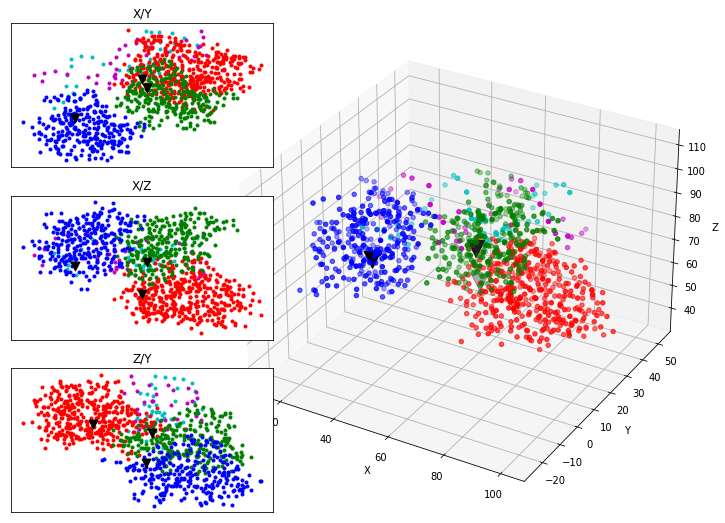

In [100]:
fig = plt.figure(figsize=(16, 9))
ax3d = fig.add_subplot(111, projection='3d')
# WS a nice feature: can add subplots on top of subplots
ax_xy = fig.add_subplot(331)
ax_xy.set_title('X/Y')
ax_xz = fig.add_subplot(334)
ax_xz.set_title('X/Z')
ax_zy = fig.add_subplot(337)
ax_zy.set_title('Z/Y')
# WS colored DNA strands cyan, magenta instead of grays
color = {'A': 'r', 'B': 'g', 'C': 'b', 'E': 'c', 'F': 'm'}
zx, zy, zz = [], [], []
for chain in p53_1tup.get_chains():
    xs, ys, zs = [], [], []
    for residue in chain.get_residues():
        # WS make residue object an iterator,
        #    just get FIRST atom of the residue to plot with next()
        #ref_atom = next(residue.get_iterator())
        # WS replaced get_iterator with get_atoms: clearer, works the same
        ref_atom = next(residue.get_atoms())
        x, y, z = ref_atom.coord
        if ref_atom.element == 'ZN':
            zx.append(x)
            zy.append(y)
            zz.append(z)
            continue
        xs.append(x)
        ys.append(y)
        zs.append(z)
    ax3d.scatter(xs, ys, zs, color=color[chain.id])
    ax_xy.scatter(xs, ys, marker='.', color=color[chain.id])
    ax_xz.scatter(xs, zs, marker='.', color=color[chain.id])
    ax_zy.scatter(zs, ys, marker='.', color=color[chain.id])
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
ax3d.scatter(zx, zy, zz, color='k', marker='v', s=300)
# WS zinc markers follow
ax_xy.scatter(zx, zy, color='k', marker='v', s=80)
ax_xz.scatter(zx, zz, color='k', marker='v', s=80)
ax_zy.scatter(zz, zy, color='k', marker='v', s=80)
for ax in [ax_xy, ax_xz, ax_zy]:
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

In [103]:
# WS explore the object structures
ws.attrs(p53_1tup.get_chains(), skip=False)
# get_chains() IS an iterable: it has a __next__:

["OBJECT TYPE: <class 'generator'>",
 '__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [117]:
dd = list(p53_1tup.get_chains())
dd

[<Chain id=E>, <Chain id=F>, <Chain id=A>, <Chain id=B>, <Chain id=C>]

In [118]:
ws.attrs(dd[2], skip=False)  # chain object is NOT an iterable

["OBJECT TYPE: <class 'Bio.PDB.Chain.Chain'>",
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_generate_full_id',
 '_id',
 '_reset_full_id',
 '_translate_id',
 'add',
 'atom_to_internal_coordinates',
 'center_of_mass',
 'child_dict',
 'child_list',
 'copy',
 'detach_child',
 'detach_parent',
 'full_id',
 'get_atoms',
 'get_full_id',
 'get_id',
 'get_iterator',
 'get_level',
 'get_list',
 'get_parent',
 'get_residues',
 'get_unpacked_list',
 'has_id',
 'id',
 'insert',
 'internal_coord',
 'internal_to_atom_coordinates',
 'level',
 'parent',
 'set_parent',
 'transform',
 'xtra']

In [119]:
ws.attrs(dd[2].get_residues(), skip=False)  # get_residues function IS an iterator (ie generator)

["OBJECT TYPE: <class 'generator'>",
 '__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [121]:
ee = list(dd[2].get_residues())
ws.attrs(ee[0], skip=False)
# WS  residue object is NOT an iterable: it is missing a __next__:
#     get_iterator() or get_atoms() makes it an iterator (see plotting code above)

["OBJECT TYPE: <class 'Bio.PDB.Residue.Residue'>",
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_generate_full_id',
 '_id',
 '_reset_full_id',
 'add',
 'center_of_mass',
 'child_dict',
 'child_list',
 'copy',
 'detach_child',
 'detach_parent',
 'disordered',
 'flag_disordered',
 'full_id',
 'get_atoms',
 'get_full_id',
 'get_id',
 'get_iterator',
 'get_level',
 'get_list',
 'get_parent',
 'get_resname',
 'get_segid',
 'get_unpacked_list',
 'has_id',
 'id',
 'insert',
 'internal_coord',
 'is_disordered',
 'level',
 'parent',
 'resname',
 'segid',
 'set_parent',
 'transform',
 'xtra']

In [122]:
ee[0]

<Residue SER het=  resseq=94 icode= >

In [123]:
hh = list(ee[0].get_iterator())
hh

[<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom OG>]

In [128]:
# WS use this instead of get_iterator, same result, but clearer
list(ee[0].get_atoms())

[<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom OG>]

In [129]:
# list() alone probably invokes get_iterator()? and works the same
list(ee[0])

[<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom OG>]

In [130]:
ws.attrs(hh[0], skip=False) # WS atom object not an iterable

["OBJECT TYPE: <class 'Bio.PDB.Atom.Atom'>",
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_assign_atom_mass',
 '_assign_element',
 '_sorting_keys',
 'altloc',
 'anisou_array',
 'bfactor',
 'coord',
 'copy',
 'detach_parent',
 'disordered_flag',
 'element',
 'flag_disorder',
 'full_id',
 'fullname',
 'get_altloc',
 'get_anisou',
 'get_bfactor',
 'get_charge',
 'get_coord',
 'get_full_id',
 'get_fullname',
 'get_id',
 'get_level',
 'get_name',
 'get_occupancy',
 'get_parent',
 'get_radius',
 'get_serial_number',
 'get_sigatm',
 'get_siguij',
 'get_vector',
 'id',
 'is_disordered',
 'level',
 'mass',
 'name',
 'occupancy',
 'parent',
 'pqr_charge',
 'radiu